In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('iris.csv')

In [21]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [23]:
X_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
Y_columns = ['variety']

In [24]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [25]:
classes = ['Setosa', 'Versicolor', 'Virginica']

In [26]:
df.variety.replace(classes, [0,1,2], inplace = True)

In [27]:
df.variety

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [28]:
def normalization(x, axis = -1, order = 2):
    l2 = np.atleast_1d(np.linalg.norm(x,order,axis))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)

def one_hot_encoding(y):
    columns = np.amax(y) + 1
    rows = len(y)
    array = np.zeros((rows , columns))
    for i in range(rows):
        array[i, y[i]] = 1
    return array
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * ( 1 - sigmoid(x))

In [29]:
X = pd.DataFrame(df, columns = X_columns)
X = X.values
X = normalization(X)
X[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [30]:
Y = pd.DataFrame(df, columns = Y_columns)
Y = Y.values
Y = Y.flatten()
Y = one_hot_encoding(Y)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [31]:
def weight_init(in_channel, out_channel):
    return np.random.random((in_channel, out_channel))

def calculate_loss(error):
    return np.mean(abs(error))

In [32]:
def mlp_training(X,Y, lr = 0.1,epochs = 50, hidden_dims = [10,10]):
    w0,w1, w2 = weight_init(4,hidden_dims[0]),weight_init(hidden_dims[1],hidden_dims[1]),weight_init(hidden_dims[1],3)
    losses, acc = [], []
    
    for epoch in range(epochs):
        
        input_layer = X
        hidden1 = sigmoid(np.dot(input_layer,w0))
        hidden2 = sigmoid(np.dot(hidden1, w1))
        output_layer = sigmoid(np.dot(hidden2, w2))
        
        output_layer_error = Y - output_layer
        output_layer_delta = output_layer_error * sigmoid_derivative(output_layer)
        
        hidden2_error = output_layer_delta.dot(w2.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(hidden2)
        
        hidden1_error = hidden2_delta.dot(w1.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(hidden1)
        
        w2 += hidden2.T.dot(output_layer_delta) * lr
        w1 += hidden1.T.dot(hidden2_delta) * lr
        w0 += input_layer.T.dot(hidden1_delta) * lr
    
        loss = np.mean(abs(output_layer_error))
        accuracy = (1 - loss) * 100
        losses.append(loss)
        acc.append(accuracy)
        if epoch % 100 == 0:
            print(f"{epoch}/{epochs}: Loss = {loss} \t Accuracy = {accuracy}")
    print(f"{epoch}/{epochs}: Loss = {loss} \t Accuracy = {accuracy}")
    return [losses, acc]
        

In [ ]:
history = mlp_training(X,Y, lr = 0.01, epochs = 10000000000000000000000000, hidden_dims = [100,100])

0/10000000000000000000000000: Loss = 0.6666666666666666 	 Accuracy = 33.333333333333336
100/10000000000000000000000000: Loss = 0.5195985195617074 	 Accuracy = 48.040148043829255
200/10000000000000000000000000: Loss = 0.4709504783909953 	 Accuracy = 52.90495216090048
300/10000000000000000000000000: Loss = 0.4643683816473083 	 Accuracy = 53.56316183526917
400/10000000000000000000000000: Loss = 0.4611280105163413 	 Accuracy = 53.887198948365864
500/10000000000000000000000000: Loss = 0.4591904112794557 	 Accuracy = 54.08095887205443
600/10000000000000000000000000: Loss = 0.45789457749813606 	 Accuracy = 54.2105422501864
700/10000000000000000000000000: Loss = 0.4569607567487066 	 Accuracy = 54.30392432512934
800/10000000000000000000000000: Loss = 0.45624559174434764 	 Accuracy = 54.375440825565235
900/10000000000000000000000000: Loss = 0.45566139474038964 	 Accuracy = 54.433860525961045
1000/10000000000000000000000000: Loss = 0.455140216242277 	 Accuracy = 54.48597837577229
1100/10000000000

9200/10000000000000000000000000: Loss = 0.02943285942393562 	 Accuracy = 97.05671405760644
9300/10000000000000000000000000: Loss = 0.02932582831788956 	 Accuracy = 97.06741716821105
9400/10000000000000000000000000: Loss = 0.029221205013255924 	 Accuracy = 97.0778794986744
9500/10000000000000000000000000: Loss = 0.029118924736829213 	 Accuracy = 97.08810752631707
9600/10000000000000000000000000: Loss = 0.029018927661143012 	 Accuracy = 97.0981072338857
9700/10000000000000000000000000: Loss = 0.02892115838857336 	 Accuracy = 97.10788416114266
9800/10000000000000000000000000: Loss = 0.028825565475961826 	 Accuracy = 97.11744345240382
9900/10000000000000000000000000: Loss = 0.0287321009972875 	 Accuracy = 97.12678990027125
10000/10000000000000000000000000: Loss = 0.02864072014214917 	 Accuracy = 97.13592798578509
10100/10000000000000000000000000: Loss = 0.02855138084800625 	 Accuracy = 97.14486191519937
10200/10000000000000000000000000: Loss = 0.028464043464278194 	 Accuracy = 97.153595653

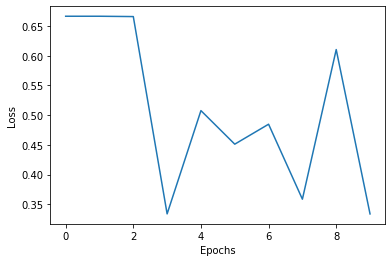

In [41]:
plt.plot(history[0])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

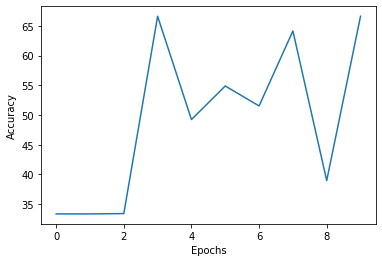

In [42]:
plt.plot(history[1])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [36]:
print(f"Maximum Acccuracy = {max(history[1])}")

Maximum Acccuracy = 81.09714825133068
